theta is: [[4.51359766]
 [2.98323418]]


/usr/local/anaconda3/envs/xwj_llm/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/anaconda3/envs/xwj_llm/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/anaconda3/envs/xwj_llm/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/anaconda3/envs/xwj_llm/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24402 (\N{CJK UNIFIED IDEOGRAPH-5F52}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/anaconda3/envs/xwj_llm/lib/python3.10/site-packages/IPython/core/pylabtoo

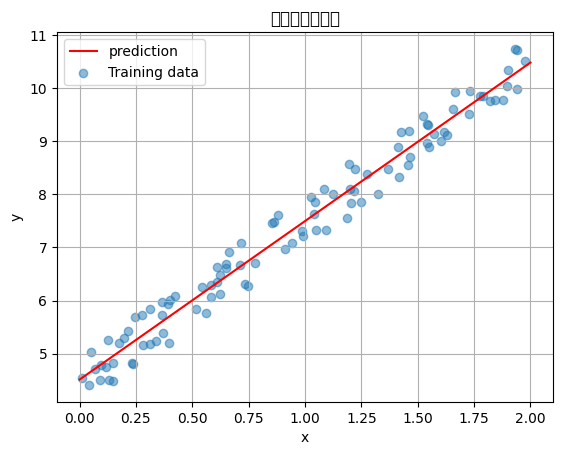

In [1]:
"""闭式解"""
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X  + np.random.rand(100, 1)

X_b = np.c_[np.ones((100, 1)), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(f"theta is: {theta_best}")

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones([2, 1]), X_new]
y_pred = X_new_b.dot(theta_best)

plt.plot(X_new, y_pred, 'r-', label="prediction")
plt.scatter(X, y, alpha=0.5, label="Training data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("线性回归示意图")
plt.grid(True)
plt.show()

Learned parameters: [4.21509612 2.77011342]


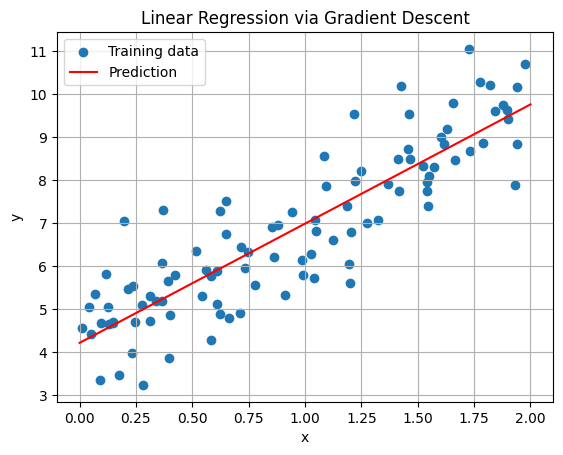

In [2]:
"""使用梯度下降"""
import numpy as np
import matplotlib.pyplot as plt

# 1. 生成模拟数据
np.random.seed(42)
m = 100  # 样本数
X_raw = 2 * np.random.rand(m, 1)  # 原始特征 X ∈ ℝ^{m×1}
y = 4 + 3 * X_raw + np.random.randn(m, 1)  # y = 4 + 3x + 噪声

# 2. 添加偏置项 x0 = 1
X = np.c_[np.ones((m, 1)), X_raw]  # 变为 ℝ^{m×2}
y = y.reshape(-1, 1)  # 确保 y 是列向量

# 3. 梯度下降函数
def gradient_descent(X, y, alpha=0.1, iterations=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    for _ in range(iterations):
        gradient = (1/m) * X.T @ (X @ theta - y)
        theta -= alpha * gradient
    return theta

# 4. 训练模型
theta = gradient_descent(X, y, alpha=0.1, iterations=1000)
print("Learned parameters:", theta.ravel())

# 5. 预测
X_new = np.array([[1, 0], [1, 2]])  # 在 x=0 和 x=2 处做预测
y_predict = X_new @ theta

# 6. 可视化结果
plt.scatter(X_raw, y, label="Training data")
plt.plot(X_new[:,1], y_predict, color='red', label="Prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression via Gradient Descent")
plt.grid(True)
plt.show()


Epoch 0, Loss: 10.2279
Epoch 100, Loss: 1.9166
Epoch 200, Loss: 0.6249
Epoch 300, Loss: 0.4082
Epoch 400, Loss: 0.3692
Epoch 500, Loss: 0.3618
Epoch 600, Loss: 0.3603
Epoch 700, Loss: 0.3600
Epoch 800, Loss: 0.3600
Epoch 900, Loss: 0.3600
Learned W:
 [[ 1.01545186 -1.94216086  0.46836362]
 [ 0.56970437  1.01575371 -1.00715772]
 [ 1.52780448 -0.48282134  1.00364512]
 [-1.06578324  0.5211569   1.96222962]]
Learned b:
 [[ 2.03314063 -0.92762688  0.53312956]]


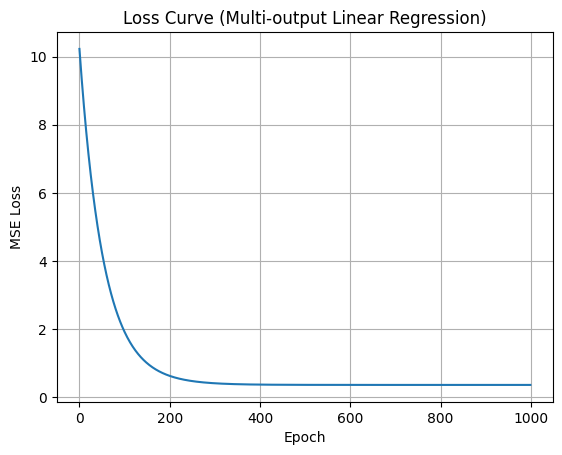

In [3]:
"""多元多目标线性回归"""
"""单层MLP"""
import numpy as np
import matplotlib.pyplot as plt

# 1. 构造模拟数据
np.random.seed(42)
m, n, k = 200, 4, 3  # 样本数、特征数、输出维度
X = np.random.randn(m, n)
true_W = np.array([[1.0, -2.0, 0.5],
                   [0.5, 1.0, -1.0],
                   [1.5, -0.5, 1.0],
                   [-1.0, 0.5, 2.0]])  # W ∈ ℝ^{n×k}
true_b = np.array([[2.0, -1.0, 0.5]])  # b ∈ ℝ^{1×k}

Y = X @ true_W + true_b + np.random.randn(m, k) * 0.5  # 加噪声

# 2. 初始化参数
W = np.zeros((n, k))
b = np.zeros((1, k))
alpha = 0.01

# 3. 定义前向、损失、反向传播
def predict(X, W, b):
    return X @ W + b

def compute_loss(Y_pred, Y_true):
    m = Y_true.shape[0]
    return (1 / (2 * m)) * np.sum((Y_pred - Y_true) ** 2)

def compute_gradients(X, Y_pred, Y_true):
    m = Y_true.shape[0]
    dW = (1 / m) * X.T @ (Y_pred - Y_true)
    db = (1 / m) * np.sum(Y_pred - Y_true, axis=0, keepdims=True)
    return dW, db

# 4. 训练过程
loss_history = []
for epoch in range(1000):
    Y_pred = predict(X, W, b)
    loss = compute_loss(Y_pred, Y)
    dW, db = compute_gradients(X, Y_pred, Y)

    W -= alpha * dW
    b -= alpha * db

    loss_history.append(loss)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# 5. 打印结果
print("Learned W:\n", W)
print("Learned b:\n", b)

# 6. 可视化损失
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss Curve (Multi-output Linear Regression)")
plt.grid(True)
plt.show()

In [4]:
"""多元多层多输出"""
import numpy as np

# ====== 1. 数据准备 ======
np.random.seed(42)
m, n, k = 200, 10, 3   # 样本数, 输入维度, 输出维度
X = np.random.randn(m, n)
true_W = np.random.randn(n, k)
true_b = np.random.randn(1, k)
Y = X @ true_W + true_b + np.random.randn(m, k) * 0.5

# ====== 2. 网络结构定义 ======
hidden_dim = 64

# 初始化权重
W1 = np.random.randn(n, hidden_dim) * 0.01
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, k) * 0.01
b2 = np.zeros((1, k))

# ReLU 激活函数及其导数
def relu(Z):
    return np.maximum(0, Z)

def relu_deriv(Z):
    return (Z > 0).astype(float)

# 均方误差损失
def compute_loss(Y_pred, Y_true):
    m = Y_true.shape[0]
    return (1/(2*m)) * np.sum((Y_pred - Y_true) ** 2)

# ====== 3. 训练参数 ======
alpha = 0.01
epochs = 1000
loss_history = []

# ====== 4. 训练过程 ======
for epoch in range(epochs):
    # 前向传播
    Z1 = X @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    Y_pred = Z2  # 输出层无激活

    # 损失
    loss = compute_loss(Y_pred, Y)
    loss_history.append(loss)

    # 反向传播
    m = X.shape[0]
    dZ2 = (Y_pred - Y) / m
    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_deriv(Z1)
    dW1 = X.T @ dZ1
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # 参数更新
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W1 -= alpha * dW1
    b1 -= alpha * db1

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# ====== 5. 最终结果 ======
print("\nFinal loss:", loss_history[-1])


Epoch 0, Loss: 17.7512
Epoch 100, Loss: 15.3922
Epoch 200, Loss: 3.3782
Epoch 300, Loss: 0.5724
Epoch 400, Loss: 0.4195
Epoch 500, Loss: 0.3798
Epoch 600, Loss: 0.3564
Epoch 700, Loss: 0.3403
Epoch 800, Loss: 0.3279
Epoch 900, Loss: 0.3171

Final loss: 0.3076445337668986
